In [1]:
import pandas as pd
import numpy as np
import os
import sys
import tensorflow as tf
import gc
import cv2
from tqdm import tqdm
tqdm.pandas()
import random
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
TRAIN_ON_KAGGLE = False

In [2]:
sys.path.append("..")

In [3]:
from tensorflow.keras.layers import Input,Conv2D,Lambda,Dropout,MaxPooling2D
from tensorflow.keras.layers import Conv2DTranspose,concatenate
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard
from tensorflow.keras.optimizers import Adam

In [4]:
def seed_everything(seed=51):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
seed_everything(seed=51)

In [5]:
WIDTH = 256
HEIGHT = 256
CHANNELS = 3
#Model Parameters
EPOCHS = 10
BATCH_SIZE = 16

USE_TENSORBOARD = True

In [6]:
input_shape = (WIDTH,HEIGHT,CHANNELS)

In [7]:
from model import get_model

In [8]:
model = get_model(compiling=False)

In [9]:
path = os.getcwd() 
ROOT_PATH = os.path.abspath(os.path.join(path, os.pardir))

In [10]:
[x for x in os.listdir(ROOT_PATH) if 'model_epoch' in x][0]

'model_epoch_10.h5'

In [12]:
ROOT_PATH

'/home/muhammed/Documents/GitHub/DeText'

In [13]:
h5_file = [x for x in os.listdir(ROOT_PATH) if 'model_epoch' in x][0]
model = load_model(os.path.join(ROOT_PATH,h5_file))
#adam = Adam(lr = 3e-5)
#model.compile(optimizer = adam, loss = 'mean_squared_error',metrics = [tf.keras.metrics.MeanSquaredError()])

In [15]:
#get_model?

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [17]:
X_val = np.load('../data/X_val.npy')
y_val = np.load('../data/y_val.npy')
X_test = np.load('../data/X_test.npy')
y_test = np.load('../data/y_test.npy')

In [18]:
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

In [19]:
val_indexes = list(np.random.choice(len(X_val),20))
test_indexes = list(np.random.choice(len(X_test),20))

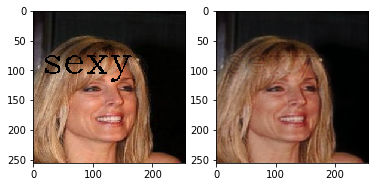

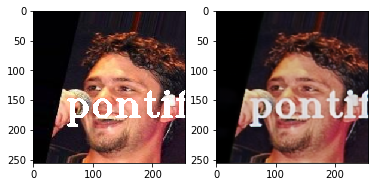

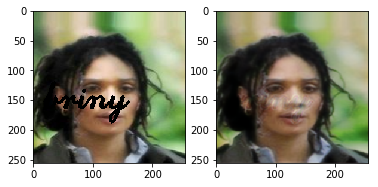

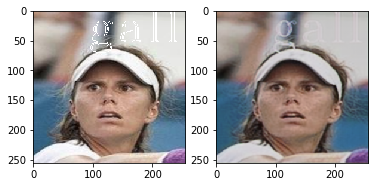

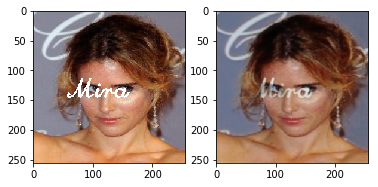

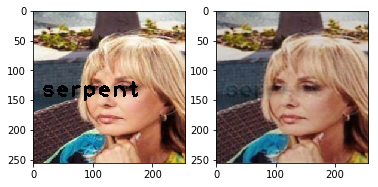

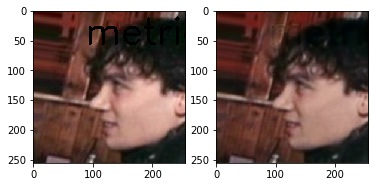

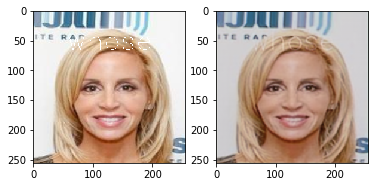

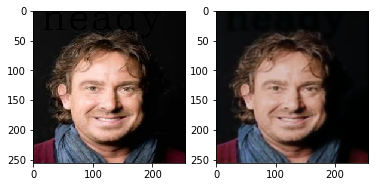

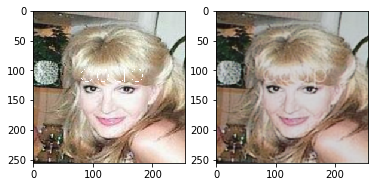

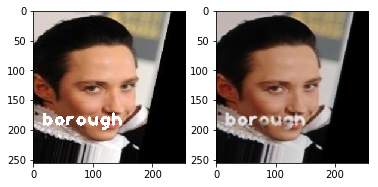

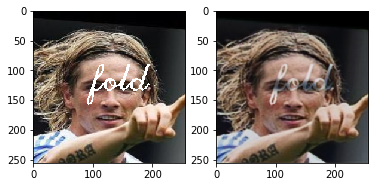

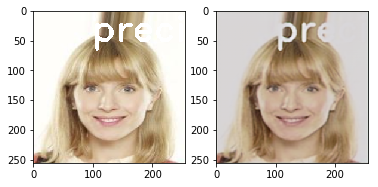

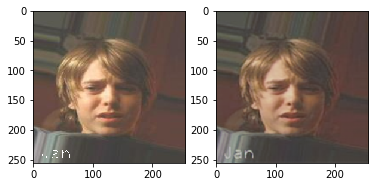

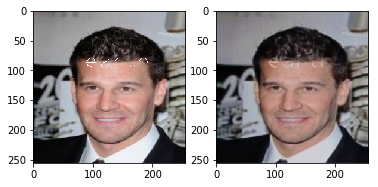

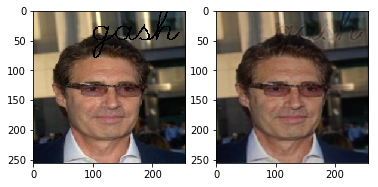

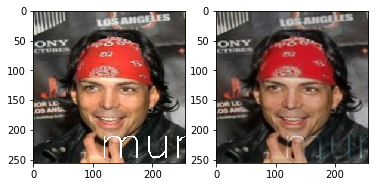

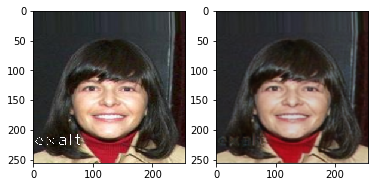

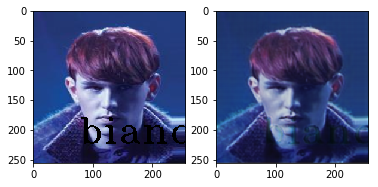

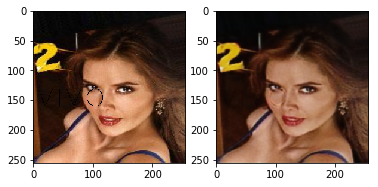

In [20]:
for image_no in val_indexes:
    plt.subplot(1, 2, 1)
    plt.imshow(X_val[image_no].astype('uint8'))
    plt.subplot(1, 2, 2)
    plt.imshow(val_preds[image_no].astype('uint8'))
    plt.show()

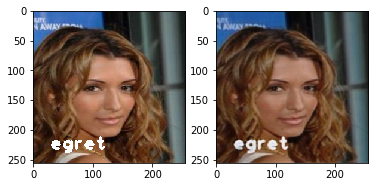

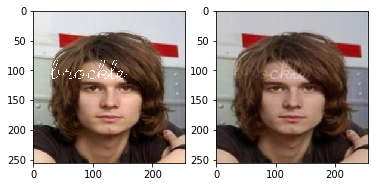

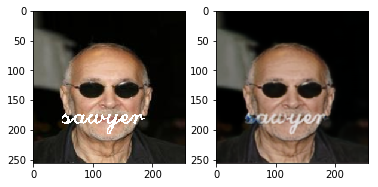

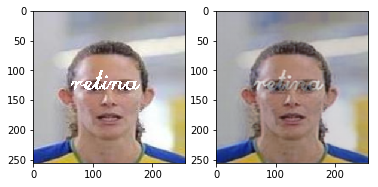

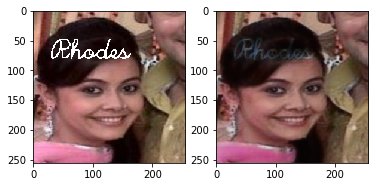

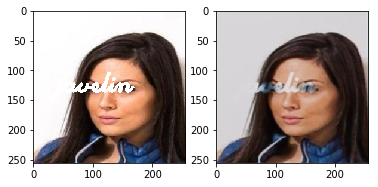

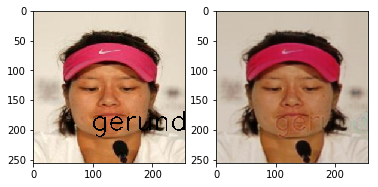

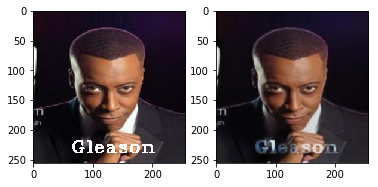

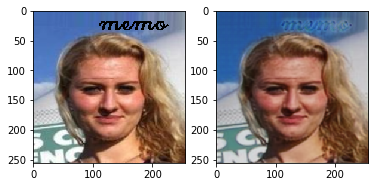

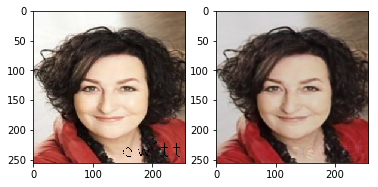

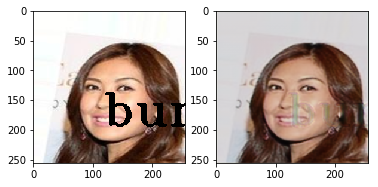

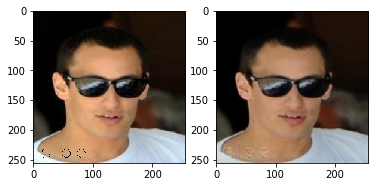

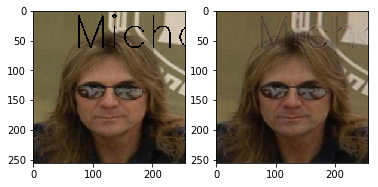

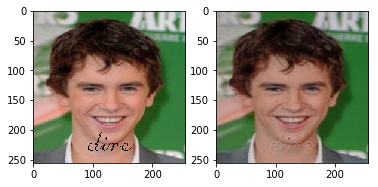

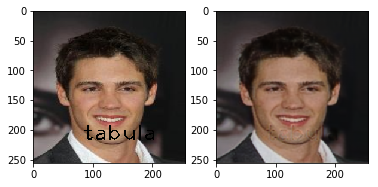

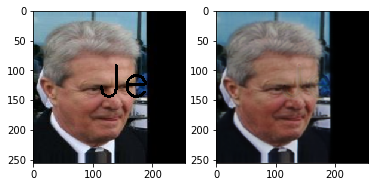

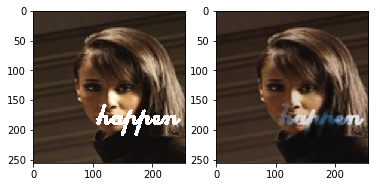

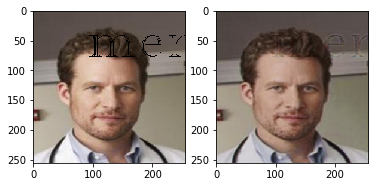

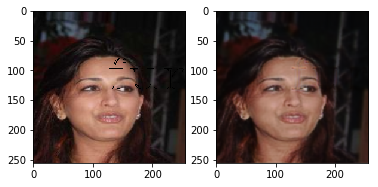

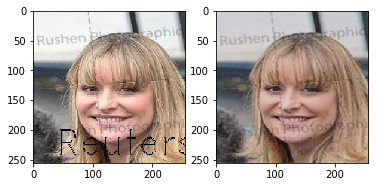

In [21]:
for image_no in test_indexes:
    plt.subplot(1, 2, 1)
    plt.imshow(X_test[image_no].astype('uint8'))
    plt.subplot(1, 2, 2)
    plt.imshow(test_preds[image_no].astype('uint8'))
    plt.show()